# Filtering

Tiffany Wang, 260684152

## 1.2 Sharpening

In [6]:
import cv2, math
import skimage as skimg
import numpy as np
import matplotlib.pyplot as plt

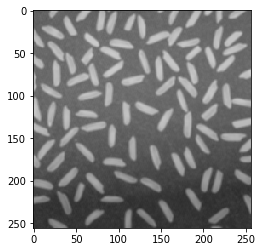

In [7]:
rice = cv2.imread('./rice.png')
plt.imshow(rice)

##### Sharpening

<p style="font-style:italic"> sharpened_image = original_image + details  </p>
<p style="font-style:italic"> details = original_image - blurred_image </p>

(Text(0.5, 1.0, 'Box Sharpen'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

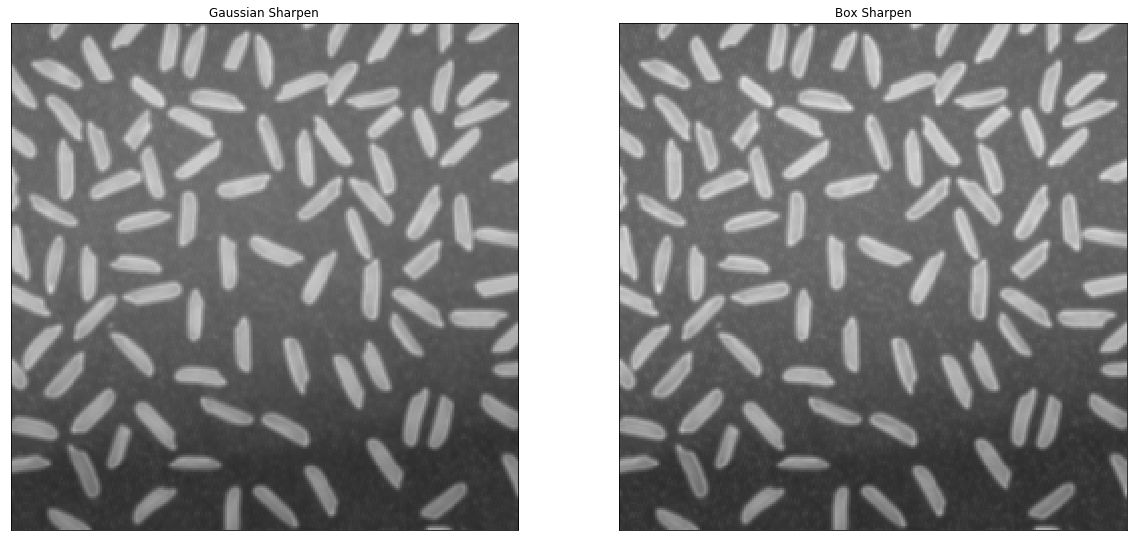

In [8]:
filter_size = 5
variance = 2

# Gaussian Filter
blurred_gaussian_rice = cv2.GaussianBlur(rice, (filter_size, filter_size), math.sqrt(variance))
gaussian_detail = cv2.subtract(rice, blurred_gaussian_rice)
sharpened_gaussian_rice = cv2.add(rice, gaussian_detail)

# Box Filter
box_filter = np.ones((filter_size, filter_size), np.float32)/(filter_size * filter_size)
blurred_box_rice = cv2.filter2D(rice, -1, box_filter)
box_detail = cv2.subtract(rice, blurred_box_rice)
sharpened_box_rice = cv2.add(rice, box_detail)

# plot
plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(sharpened_gaussian_rice)
plt.title("Gaussian Sharpen"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(sharpened_box_rice)
plt.title("Box Sharpen"), plt.xticks([]), plt.yticks([])

#### 2. Which of the two methods is expected to give better results and why? Can you observe expected result?

The Box Filter has better results. The Gaussian Blur is more gentle than the Box Filter because it gives a weighted average of each pixel's neighborhood, instead of a uniform average. This means that the Gaussian Blur preserve edges better. The sharpening operation is: 

$sharpen\_img = 2 \cdot original - blurred\_img$ 

Since the edges are more prominent with the Gaussian Blur, then they get removed more in the final sharpened image. This explains the better performance of the Box Filter in sharpening. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(Text(0.5, 1.0, 'Box Sharpen edge'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

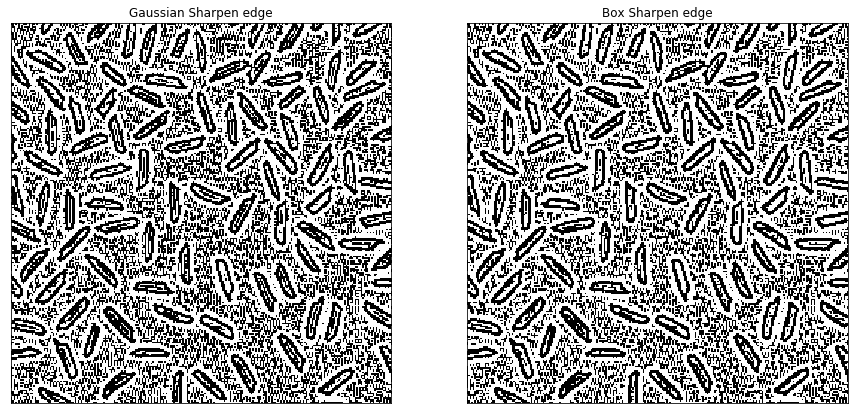

In [9]:
# detect the edges to compare sharpness of the two images 
gaussian_lap = cv2.Laplacian(sharpened_gaussian_rice, cv2.CV_64F, ksize=3)
box_lap = cv2.Laplacian(sharpened_box_rice, cv2.CV_64F, ksize=3)

# plot
plt.figure(figsize=(15, 15))
plt.subplot(121), plt.imshow(gaussian_lap)
plt.title("Gaussian Sharpen edge"), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(box_lap)
plt.title("Box Sharpen edge"), plt.xticks([]), plt.yticks([])

From the two images above, the edges on the left (Box Filter) are detected with less noise and false positive. 